In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import openpyxl
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
path = 'data.xlsx'
wb_obj = openpyxl.load_workbook(path, data_only = True)
df = wb_obj['Состояние системы']
x1,x2,x3,x4,x5,x6,x7,x8,x9 = (df['A18':'A21'],df['C18':'C26'],df['E18':'E23'],df['G18':'G28'],df['I18':'I24'],df['K18':'K23'],df['M18':'M25'],df['O18':'O25'],df['Q18':'Q212'])
#x, y, z = df.R.values, df.RL.values, df['h'].values*180/3.1415
y1,y2,y3,y4,y5,y6,y7,y8,y9 = (df['B18':'B21'],df['D18':'D26'],df['F18':'F23'],df['H18':'H28'],df['J18':'J24'],df['L18':'L23'],df['N18':'N25'],df['P18':'P25'],df['R18':'R212'])
x_array = np.asarray([x1,x2,x3,x4,x5,x6,x7,x8,x9], dtype = 'object')
y_array = np.asarray([y1,y2,y3,y4,y5,y6,y7,y8,y9], dtype = 'object')
x_scatter =[]
y_scatter = []
for i in range(len(x_array)):
    x_scat = []
    y_scat = []
    for j in range(len(x_array[i])):
        x_scat.append((df.cell(row = 18+j, column = 2*i+1)).value)
        y_scat.append((df.cell(row = 18+j, column = 2*i+2)).value)
    x_scatter.append(np.array(x_scat))
    y_scatter.append(np.array(y_scat))

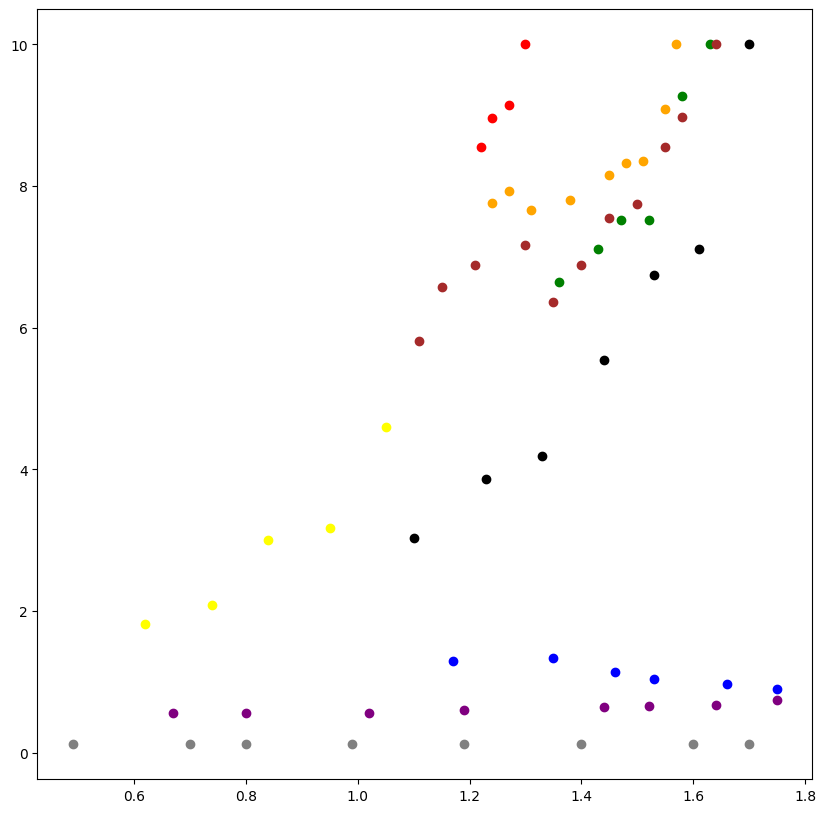

In [3]:
plt.figure(figsize=(10, 10))

colors = ['red', 'orange', 'green', 'brown', 'black', 'blue', 'purple', 'grey', 'yellow']
for i in range(len(x_scatter)):
        plt.scatter(x_scatter[i], y_scatter[i], color = colors[i])

plt.show()

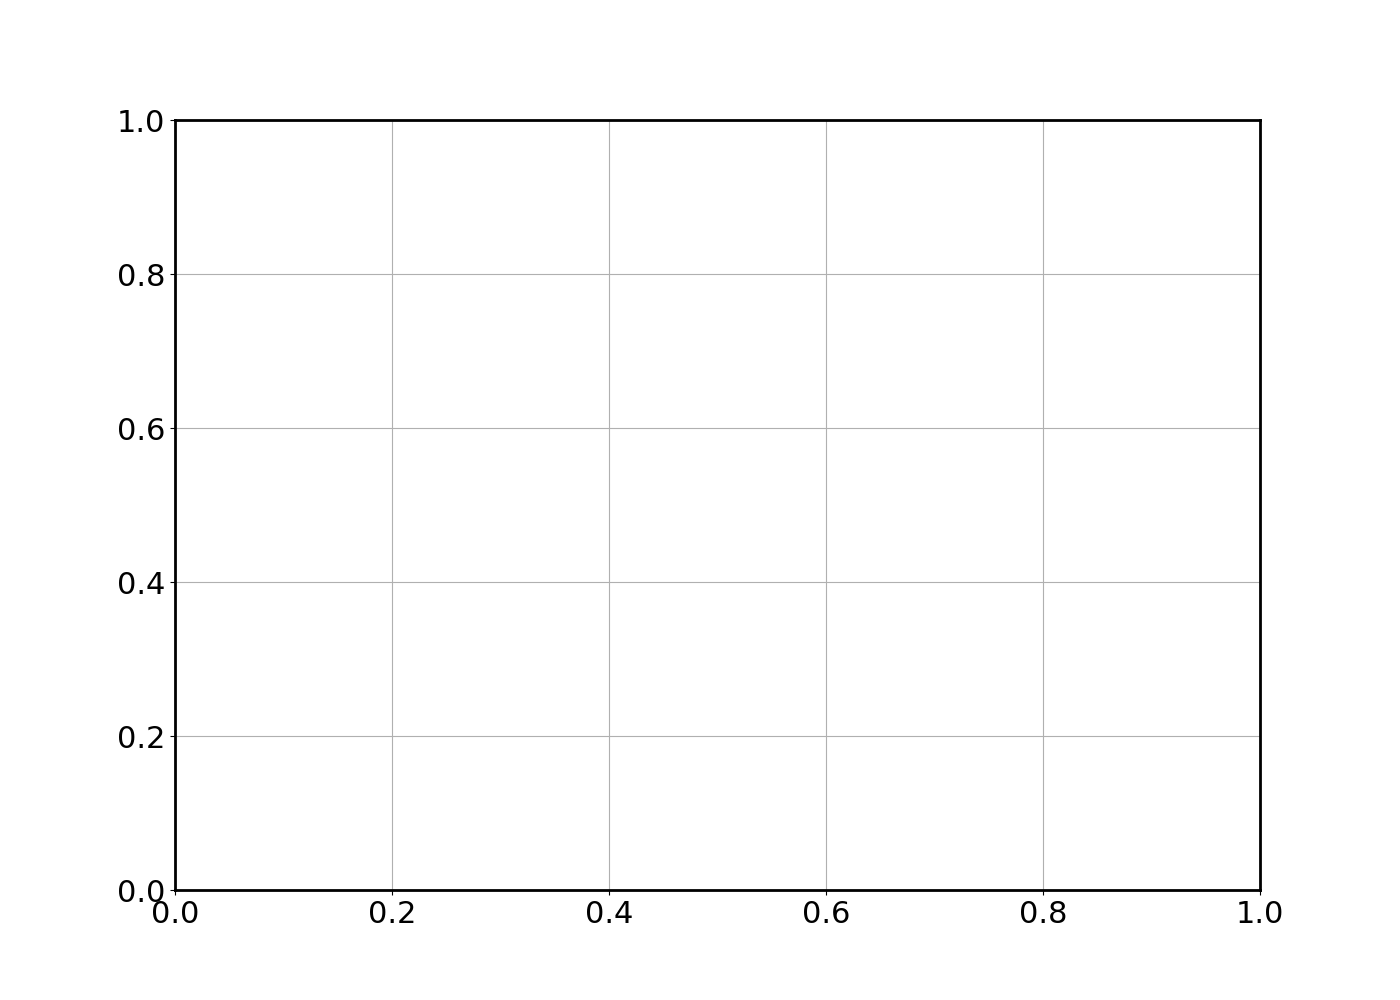

In [13]:
'''%matplotlib notebook

grid_x, grid_y = np.mgrid[3.13:3.55:20j, 0:2.19:20j]
grid_z = griddata((r, rl), h_norm, (grid_x, grid_y), method='cubic')

# Создание графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(r, rl, h_norm, c='black')

ax.set_xlabel('R')
ax.set_ylabel('RL')
ax.set_zlabel('Ux')'''


plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D', 'x']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

In [14]:
path = 'data.xlsx'
wb_obj = openpyxl.load_workbook(path, data_only = True)
df = wb_obj['Амплидуты аттрактора Рёсслера']
u_y = np.array(df['I2':'I16'])
u_x = np.array(df['H2':'H16'])
h_norm = np.array(df['J2':'J16'])
r = np.array(df['K2':'K16'])
rl = np.array(df['L2':'L16'])
#for Resler attractors



h_norm = np.array([df.cell(row = 2+x, column =10 ).value for x in range(15)])
r = np.array([df.cell(row = 2+x, column = 11).value for x in range(15)])
rl = np.array([df.cell(row = 2+x, column = 12 ).value for x in range(15)])

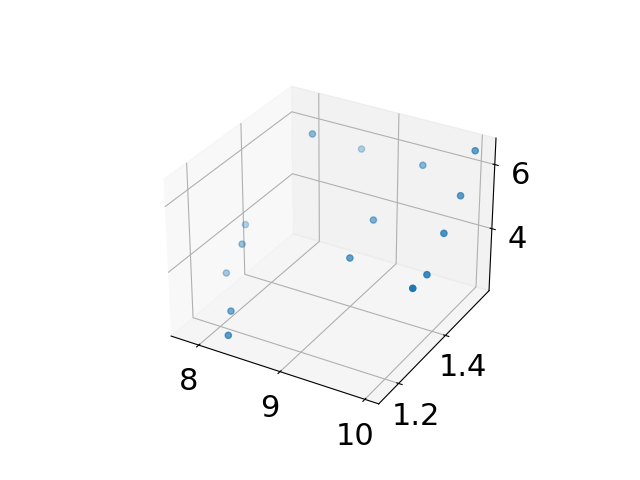

In [15]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d')

c=r+rl
# plotting
ax.scatter(rl, r, h_norm)

plt.show()

Text(0.5, 0, 'Ux')

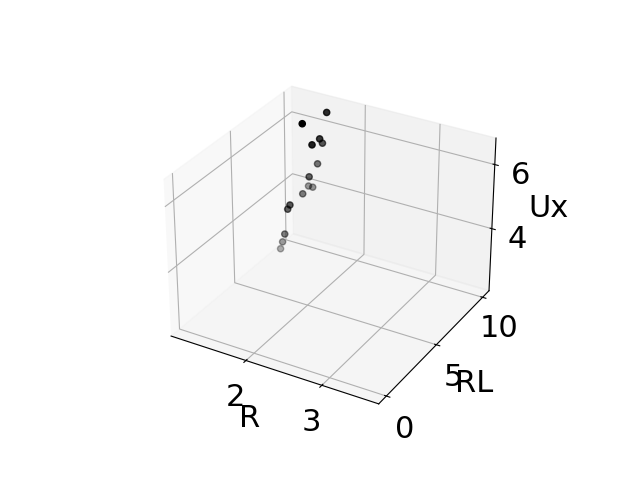

In [16]:
%matplotlib widget

grid_x, grid_y = np.mgrid[3.13:3.55:20j, 0:2.19:20j]
grid_z = griddata((r, rl), h_norm, (grid_x, grid_y), method='cubic')

# # Создание графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# # Построение поверхности
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(r,rl, h_norm, c='black')

ax.set_xlabel('R')
ax.set_ylabel('RL')
ax.set_zlabel('Ux')

In [17]:
path = 'data.xlsx'
wb_obj = openpyxl.load_workbook(path, data_only = True)
df = wb_obj['Характерный размер для одного R']
u_x = np.array([df.cell(row = 2+x, column =7 ).value for x in range(16)])
u_y = np.array([df.cell(row = 2+x, column = 8 ).value for x in range(16)])
diam = np.array([df.cell(row = 2+x, column = 11 ).value for x in range(16)])
r = 1.55
rl = np.array([df.cell(row = 2+x, column = 9).value for x in range(16)])

print(rl, diam)

[10.    8.8   7.9   7.15  7.14  1.08  1.07  0.87  0.83  0.74  0.7   0.68
  0.37  0.22  0.17  0.14] [ 3.49857114  3.02324329  1.64012195  1.3         0.          0.
  1.4         1.86815417  2.54950976  3.33541602  4.03112887 12.85496013
 11.77115118 10.04987562  8.00999376  4.8       ]


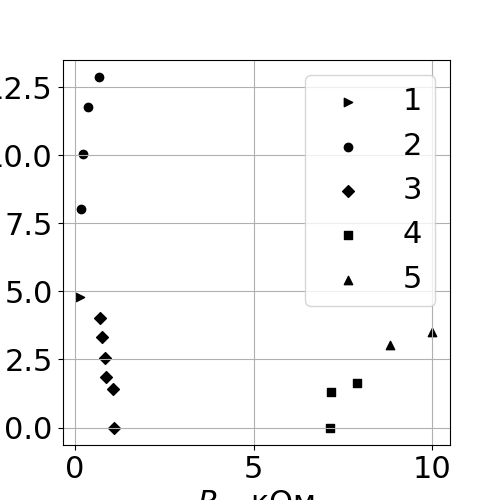

In [24]:
plt.figure(figsize=(5, 5))

diam1 = [diam[i] for i in [15]]
diam2 = [diam[i] for i in [11,12,13,14]]
diam3 = [diam[i] for i in [5,6,7,8,9,10]]
diam4 = [diam[i] for i in [2,3,4]]
diam5 = [diam[i] for i in [0,1]]

rl1 = [rl[i] for i in [15]]
rl2 = [rl[i] for i in [11,12,13,14]]
rl3 = [rl[i] for i in [5,6,7,8,9,10]]
rl4 = [rl[i] for i in [2,3,4]]
rl5 = [rl[i] for i in [0,1]]

plt.xlabel('$R_L$, кОм')
plt.ylabel('Диаметр, В')

plt.scatter(rl1, diam1, color = 'black', marker ='>', label = '1' )
plt.scatter(rl2, diam2, color = 'black', marker ='o' , label = '2')
plt.scatter(rl3, diam3, color = 'black', marker ='D', label = '3' )
plt.scatter(rl4, diam4, color = 'black', marker ='s' , label = '4')
plt.scatter(rl5, diam5, color = 'black', marker ='^' , label = '5')
plt.legend()
plt.grid()
plt.show()

In [19]:
def mnk(x, y):
    b = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
    a = np.mean(y) - b*np.mean(x)
    sb = 1/np.sqrt(len(x)) * np.sqrt(abs((np.mean(y**2) - np.mean(y)**2)/(np.mean(x**2) - np.mean(x)**2) - b**2))
    sa = sb*np.sqrt(abs(np.mean(x**2) - np.mean(x)**2))
    
    return a, b, sa, sb

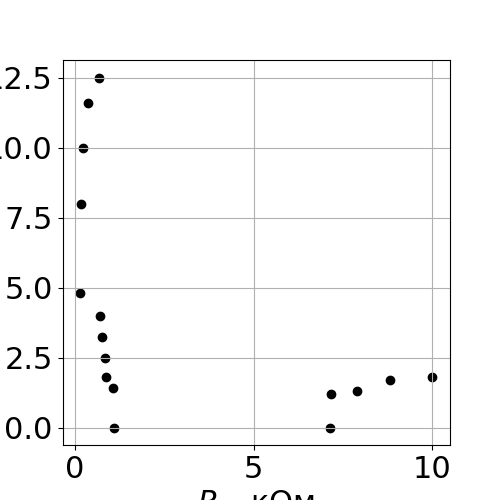

-0.7585768147925865 0.3406564048216943
6.02816015984804 0.9535021838410145


In [23]:
rl1 = rl[2::]
u_x1 = u_x[2::]
rl2 = rl[:2:]
u_x2 = u_x[:2:]
b_1, k_1, sigmab_1, sigmak_1 = mnk(rl1, u_x1)
X = np.linspace(0, 13, 100)
plt.figure(figsize=(5, 5))
#plt.plot(X, k_1*X+b_1, color = 'grey', label = '1')
plt.xlabel('$R_L$, кОм')
plt.ylabel('Разность по оси Ох, В')
plt.scatter(rl1, u_x1, color = 'black')
plt.scatter(rl2, u_x2, color = 'black')
#plt.legend()
plt.plot()
plt.grid()
plt.show()
print(k_1, sigmak_1)
print(b_1, sigmab_1)

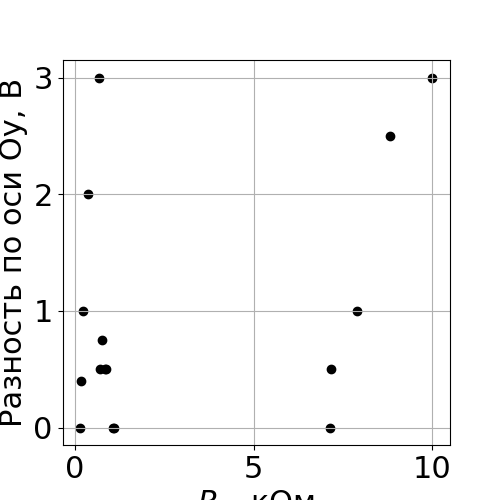

In [22]:
plt.figure(figsize=(5, 5))
plt.xlabel('$R_L$, кОм')
plt.ylabel('Разность по оси Оу, В')
plt.scatter(rl, u_y, color = 'black', )
plt.grid()
plt.show()